# 1.1. Теоретический материал – Линейные регрессионные модели
Линейная регрессия
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓 (𝑥) = 𝑏 + 𝑚 ⋅ 𝑥 +, где 𝑚 – наклон линии, а 𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть шзные функции потерь, все они
вычисляют расстояние между предсказанным значшием 𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).

In [1]:
import numpy as np
x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [2]:
m ,c  =np.linalg.lstsq(A, y,rcond = None)[0]
print (m,c)

0.9999999999999999 -0.9499999999999994


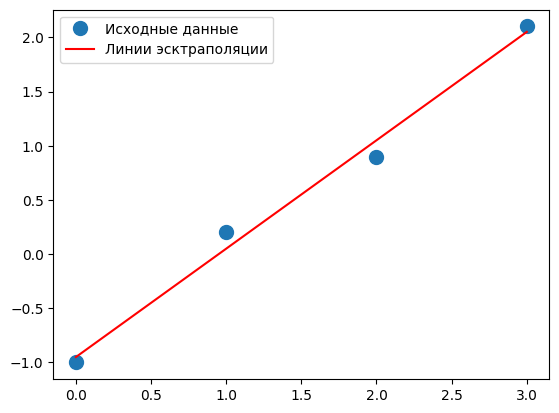

In [3]:
1#.1.1 Пример
import matplotlib.pyplot as plt
plt.plot(x,y,'o',label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x+c,'r',label = 'Линии эсктраполяции')
plt.legend()
plt.show()

In [4]:
# 1.1.2 Пример
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x+=delta*(rand(11)-0.5)
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

In [5]:
x = fromfile('x_data.txt',float,sep = '\n')
y = fromfile('y_data.txt',float,sep = '\n')
print(x)
print(y)

[-5.17414596 -4.40588328 -2.69346624 -2.14330175 -1.47763547  0.46833203
  1.14358863  1.86436737  2.89716169  3.90139096  5.29571102]
[25.20462794 15.63032204  8.50868401  3.72738679  0.62775395  0.32825112
  1.27528316  4.0293606   9.00481739 16.10602453 24.87763069]


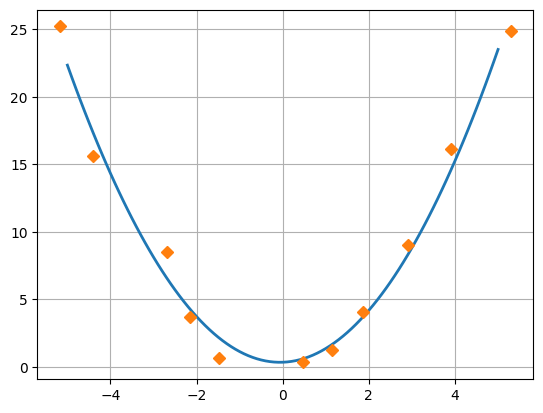

<Figure size 640x480 with 0 Axes>

In [6]:
m = vstack((x**2,x,ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-5,5,101)

plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.plot(x,y,'D')
plt.grid()
plt.show()
plt.savefig('парабола.png')

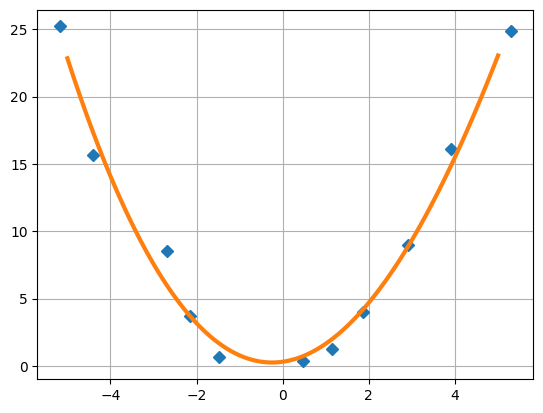

<Figure size 640x480 with 0 Axes>

In [7]:
m = vstack((x**3,x**2,x,ones(11))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-5,5,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()
plt.show()
plt.savefig('парабола.png')

[  8   7  -5   5   5   1   4   1  -3   3   1   4   6  -6  -4  -7   2  -4
   7   5  -4 -10  -2   6   8  -8  -2  -1   1  -6  -4  -5   9  -8  -3   7
  -3  -2   9   7   2   9  -3  -4  -7  -4   9  -8   1   2 -10   0  -6   1
  -7  -7   6   1   6  -9  -2  -4  -1   8  -8 -10   0   8  -7   5 -10   7
   4   6  -1  -1  -4  -1   5   2   6   7  -1   0  -5   8  -7   4 -10  -4
  -8  -2 -10  -4  -3  -9  -5  -2   2  -3] [ 10.00750471   4.96654015  -2.89207878   3.66496028   5.628682
  -1.44451831   4.66792855  -1.2610405   -1.78351009   1.09426854
  -0.03135131   6.34581824   5.38294774  -4.8248329   -5.21833149
  -7.46994951   0.42444472  -5.87958205   5.17162099   5.91672998
  -4.31659201 -12.47357288  -3.1455329    7.07498003   5.61827284
  -9.67237234  -4.26816157   0.47829408   2.80458229  -3.57422849
  -6.31995307  -5.32855127  10.25634128  -9.85117005  -5.47024373
   6.2248551   -4.3843046    0.25849901   6.77511514   6.92803415
   3.07926614   7.4125265   -5.01474308  -4.55153692  -4.66165316
 

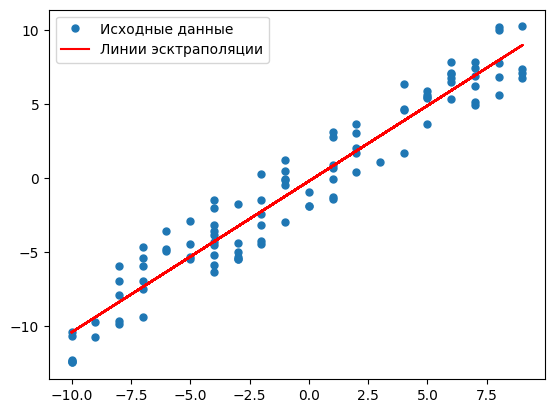

In [8]:
# Задание:
delta =5.0
x = np.array(np.random.randint(-10, 10, 100))
y = x+delta*(rand(100)-0.5)
print (x,y)
A = np.vstack([x, np.ones(100)]).T
A
m ,c  =np.linalg.lstsq(A, y,rcond = None)[0]
print (m,c)
plt.plot(x,y,'o',label = 'Исходные данные', markersize = 5)
plt.plot(x, m*x+c,'r',label = 'Линии эсктраполяции')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

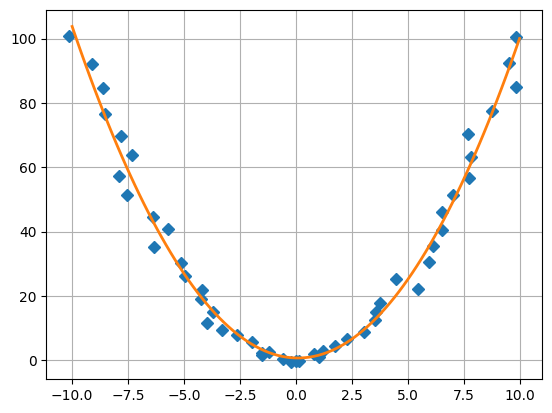

In [9]:
delta =1.5
x = linspace(-10,10,50)
y = x**2+delta*(rand(50)-0.5)
x+=delta*(rand(50)-0.5)
m = vstack((x**2,x,ones(50))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-10,10,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**2+s[1]*x_prec+s[2],'-',lw=2)
plt.grid()
plt.show

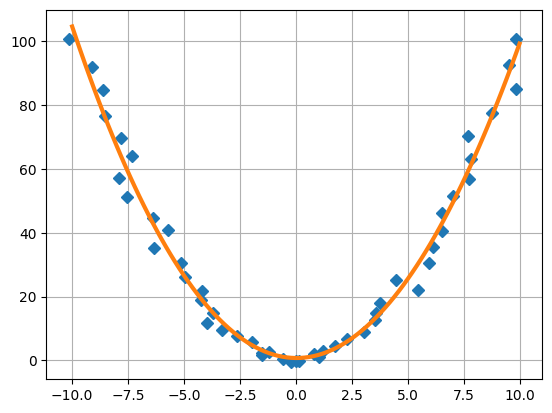

In [10]:
m = vstack((x**3,x**2,x,ones(50))).T
s = np.linalg.lstsq(m,y,rcond = None)[0]
x_prec = linspace(-10,10,101)
plt.plot(x,y,'D')
plt.plot(x_prec,s[0]*x_prec**3+s[1]*x_prec**2+s[2]*x_prec+s[3],'-',lw=3)
plt.grid()

In [11]:
# 1.1.4 Пример
beta = (0.25,0.75,0.5)
def f (x,b0,b1,b2):
    return b0 + b1 * np.exp(-b2 * x**2)
xdata = np.linspace(0,5,50)
y = f(xdata,*beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
print(ydata)

[1.0070142  0.94148803 1.00652714 1.00488727 0.8371343  0.88794354
 0.85112109 0.85196346 0.8235306  0.7196085  0.67097899 0.62572195
 0.55723115 0.57234036 0.51553477 0.45250992 0.43533277 0.43116201
 0.36186288 0.35011957 0.32591933 0.34509895 0.29573719 0.19872593
 0.30812778 0.38730536 0.2981352  0.32571199 0.28058206 0.23903267
 0.34702814 0.21379048 0.23515726 0.2155887  0.26090504 0.21321729
 0.24397242 0.29057233 0.21901347 0.2689867  0.21341829 0.32700831
 0.23990347 0.25668837 0.21641473 0.25196618 0.2374512  0.30422195
 0.30328104 0.25531241]


In [12]:
from scipy.optimize import curve_fit
beta_opt ,beta_cov = curve_fit(f,xdata,ydata)
beta_opt

array([0.25826199, 0.73087644, 0.52702889])

In [13]:
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)


0.07831838013617112


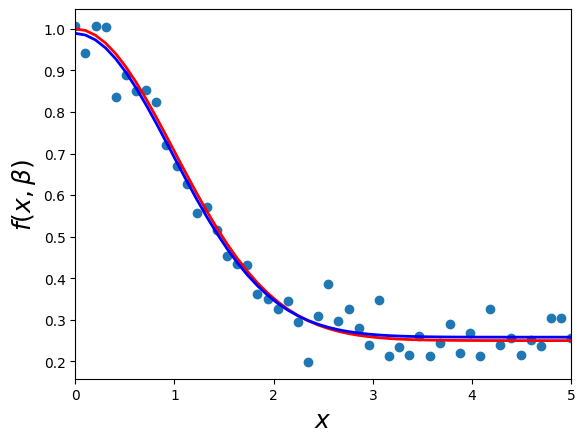

In [14]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

In [15]:
#1.1.5 Пример
beta = (0.25,0.75)
def f (x,b0,b1):
    return b0+b1*x
xdata = np.linspace(0,5,50)
y =f(xdata,*beta)
ydata = y+0.05 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


[0.249344   0.74919064]
0.00017297276369156758
0.15209674037481014


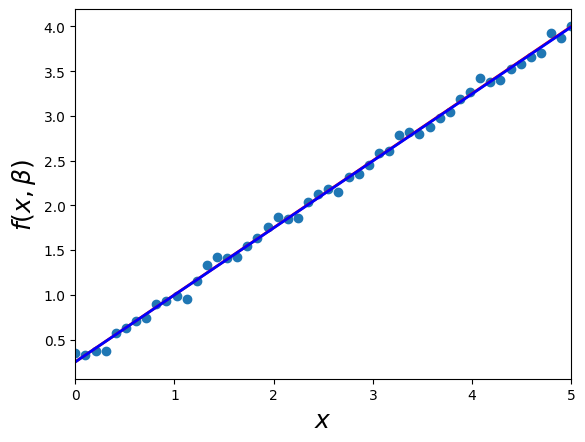

In [16]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

In [17]:
beta = (0.25,0.75,0.5)

def f (x,b0,b1,b2):
    return b0+b1*x+b2*x*x

xdata = np.linspace(0,5,50)
y =f (xdata,*beta)
ydata = y+0.05 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)



[0.28566356 0.70221589 0.50895203]
0.00019155799437743263
0.15973931657349877


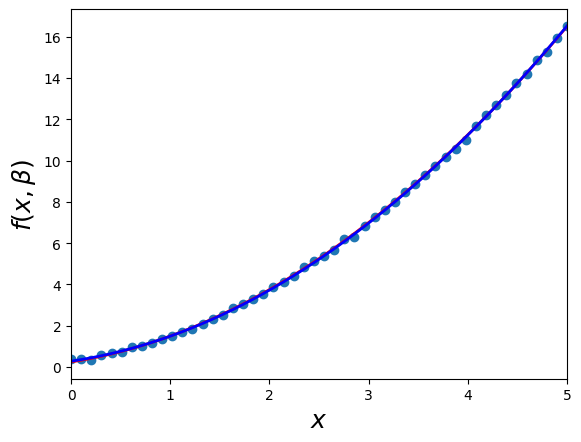

In [18]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

In [19]:
beta = (1,2)
def f (x,b0,b1):
    return b0+b1*np.log(x)
xdata = np.linspace(1,5,50)
y =f(xdata,*beta)
ydata = y+0.05 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


[0.99180616 2.01079397]
4.769493505387773e-05
0.11029173925931475


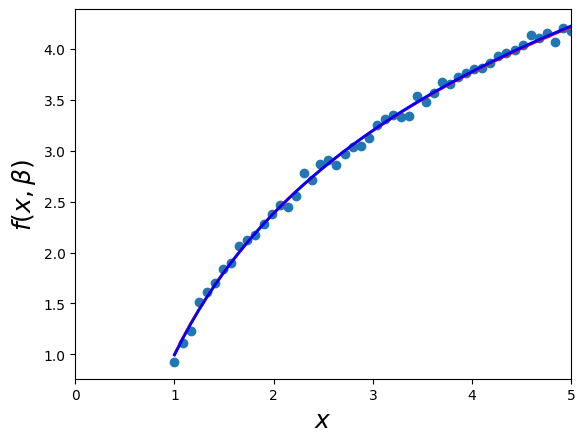

In [20]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

In [21]:
beta = (1,2)
def f (x,b0,b1):
    return b0*x**b1
xdata = np.linspace(1,5,50)
y =f(xdata,*beta)
ydata = y+0.05 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)


[0.99754926 2.00148374]
4.007331927660778e-06
0.09614426639391008


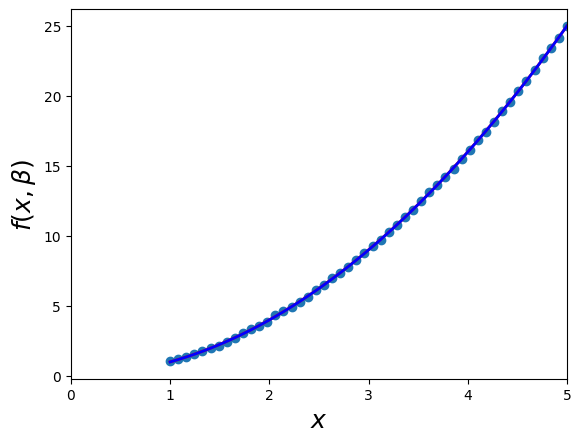

In [22]:
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

[1.0040461 0.4811254]
0.16814850245997676
147.85471705685126


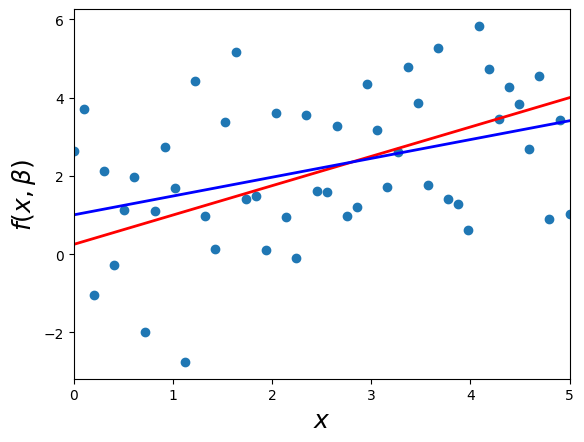

In [23]:
#task
beta = (0.25,0.75)
def f (x,b0,b1):
    return b0+b1*x
xdata = np.linspace(0,5,50)
y =f(xdata,*beta)
ydata = y+2.0 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

[0.87752528 2.05937786]
0.005904072123450635
13.652821151320376


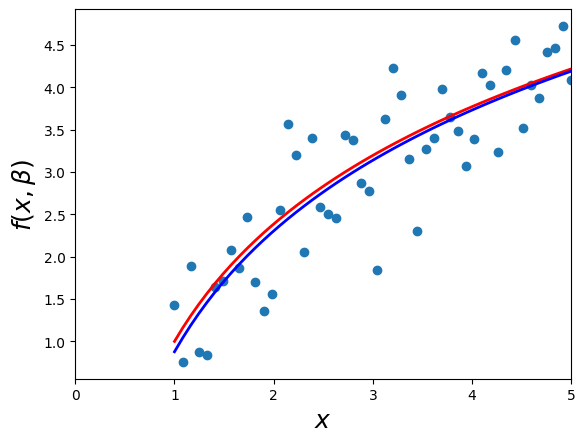

In [24]:
beta = (1,2)
def f (x,b0,b1):
    return b0+b1*np.log(x)
xdata = np.linspace(1,5,50)
y =f(xdata,*beta)
ydata = y+0.5 *np.random.randn(len(xdata))
beta_opt,beta_cov = curve_fit(f,xdata,ydata)
print(beta_opt)
lin_dev = sum(beta_cov[0])
print(lin_dev)
residuals = ydata - f(xdata,*beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw=2)
ax.plot(xdata,f(xdata,*beta_opt),'b',lw=2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$",fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$",fontsize = 18)
plt.show()

# 1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.

In [25]:
#1.2.1 Пример
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,
5.00,5.50],
"Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [27]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


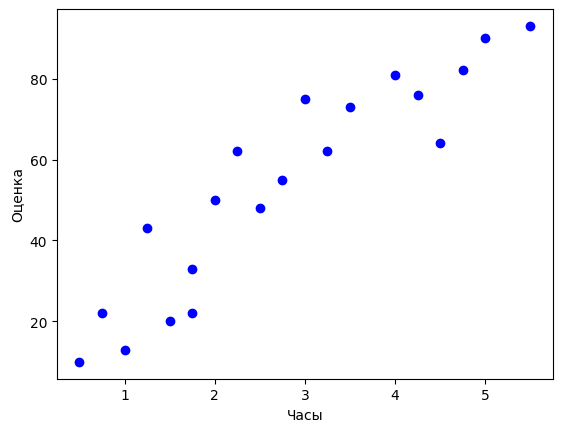

In [28]:
plt.scatter(dataset['Учебное время'],dataset["Оценка"],color= 'b', label = 'exam data')
plt. xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [29]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [31]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [32]:
print(regressor.intercept_)
print(regressor.coef_)


5.475400029908791
[17.02706744]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [33]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
df

,Actual,Predict
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


In [34]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 95.92831542463044


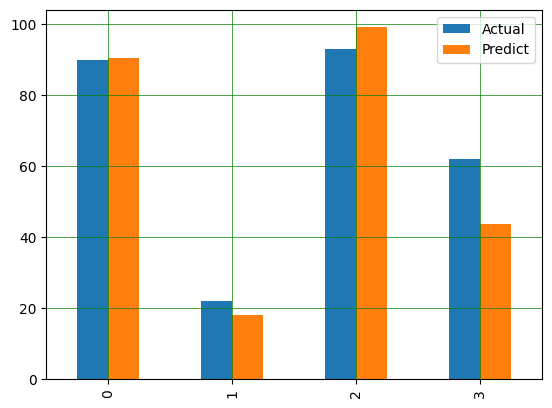

In [35]:
df.plot(kind = "bar")
plt.grid(which = 'major',linestyle = '-',linewidth = '0.5',color ='green')
plt.grid(which = 'minor',linestyle = ':',linewidth = '0.5', color = 'black')
plt.show()

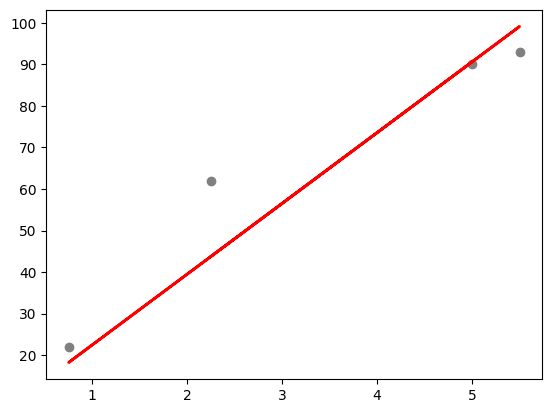

In [36]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color = 'red',linewidth = 2)
plt.show()

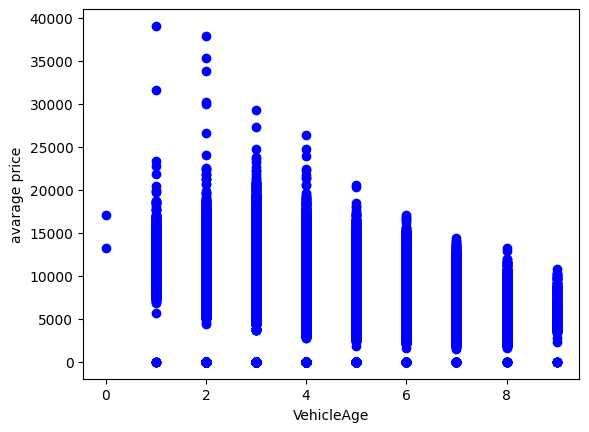

In [ ]:
param1 = 'VehicleAge'
param2 = 'MMRAcquisitionRetailAveragePrice'
plt.scatter(dataframe[param1],dataframe[param2],color= 'b', label = 'exam data')
plt. xlabel(param1)
plt.ylabel("avarage price")
plt.show()

In [ ]:
c1 = list(dataframe[param1])
c2 = list(dataframe[param2])
dict = {param1:c1,param2:c2}
dataset = pd.DataFrame(dict) 
dataset.head(10)

# dataset = pd.DataFrame(dataframe[param2],dataframe[param1])
# dataset.head(10)


# X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
# regressor = LinearRegression()
# regressor.fit(X_train,y_train)
# y_pred = regressor.predict(X_test)
# df = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
# df

,VehicleAge,MMRAcquisitionRetailAveragePrice
0,3,11636
1,5,10897
2,4,6943
3,5,4658
4,4,7723
5,5,6706
6,5,6240
7,4,6667
8,2,9687
9,2,11734


In [ ]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 1].values
print (x)
print (y)

[[3]
 [5]
 [4]
 ...
 [4]
 [3]
 [3]]
[11636 10897  6943 ...  9729  7434  8638]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5,random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
df

12064.726730254877
[-848.93280592]


,Actual,Predict
0,14303,9517.928312
1,9460,7820.062701
2,7131,9517.928312
3,5862,6971.129895
4,13632,10366.861118
...,...,...
34742,10203,10366.861118
34743,9350,11215.793924
34744,7863,8668.995507
34745,6418,9517.928312


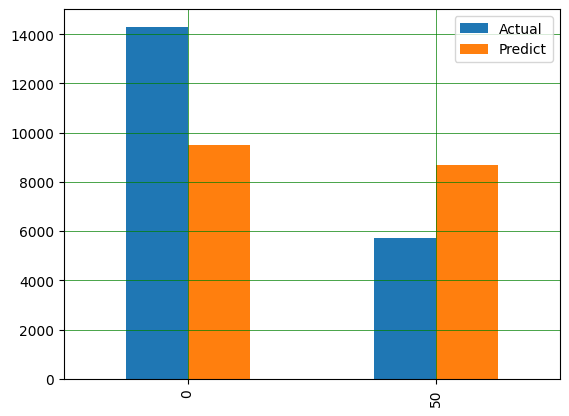

In [ ]:
df.iloc[[0,50]].plot(kind = "bar")
plt.grid(which = 'major',linestyle = '-',linewidth = '0.5',color ='green')
plt.grid(which = 'minor',linestyle = ':',linewidth = '0.5', color = 'black')
plt.show()

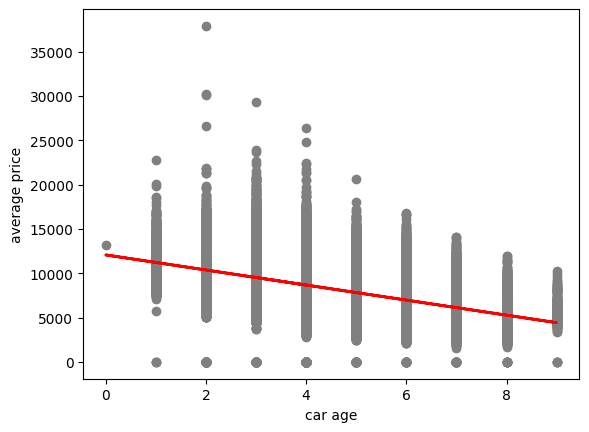

In [ ]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color = 'red',linewidth = 2)
plt.xlabel("car age")
plt.ylabel("average price")
plt.show()

# 1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.

In [ ]:
#1.3.1 Пример
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linereg = np.linalg.lstsq(X,y,rcond=None)[0]
print(linereg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn. Рассмотрим пример.


In [ ]:
#1.3.2 Пример
Y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(X)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0:"y"},inplace = False)
df2 = df2.rename(columns={0:"x1",1:"x2",2:"x3"},inplace=False)
frames = [df1,df2]
dataset = pd.concat([df1,df2],axis=1,join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [ ]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [ ]:
X = dataset[["x1","x2","x3"]]
Y = dataset["y"]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [ ]:
coef_df = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
df

,Actual,Predict
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [ ]:
print("Mean Squared error:", metrics.mean_squared_error(y_test,y_pred))

Mean Squared error: 1.327269924234307


In [ ]:
#task
# создадим датасет на основе двух столбцов изночального датасета
url = 'https://raw.githubusercontent.com/akmand/datasets/main/carvana_kicks_clean.csv'
dataframe = pd.read_csv(url)
dataframe.head(10)

,VehicleAge,Make,Model,Trim,SubModel,Transmission,WheelType,VehOdo,Size,TopThreeAmericanName,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,IsBadBuy
0,3,MAZDA,MAZDA3,i,4D SEDAN I,AUTO,Alloy,89046,MEDIUM,OTHER,...,9829,11636,13600,7451,8552,11597,12409,7100.0,1113,0
1,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,AUTO,Alloy,93593,LARGE TRUCK,CHRYSLER,...,8383,10897,12572,7456,9222,11374,12791,7600.0,1053,0
2,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,AUTO,Covers,73807,MEDIUM,CHRYSLER,...,4760,6943,8457,4035,5557,7146,8702,4900.0,1389,0
3,5,DODGE,NEON,SXT,4D SEDAN,AUTO,Alloy,65617,COMPACT,CHRYSLER,...,2675,4658,5690,1844,2646,4375,5518,4100.0,630,0
4,4,FORD,FOCUS,ZX3,2D COUPE ZX3,MANUAL,Covers,69367,COMPACT,FORD,...,5054,7723,8707,3247,4384,6739,7911,4000.0,1020,0
5,5,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,AUTO,Covers,81054,MEDIUM,OTHER,...,4908,6706,8577,4709,5827,8149,9451,5600.0,594,0
6,5,KIA,SPECTRA,EX,4D SEDAN EX,AUTO,Covers,65328,MEDIUM,OTHER,...,4038,6240,8496,2980,4115,6230,8603,4200.0,533,0
7,4,FORD,TAURUS,SE,4D SEDAN SE,AUTO,Covers,65805,MEDIUM,FORD,...,4342,6667,7707,3713,4578,6942,8242,4500.0,825,0
8,2,KIA,SPECTRA,EX,4D SEDAN EX,AUTO,Covers,49921,MEDIUM,OTHER,...,7274,9687,10624,6417,7371,9637,10778,5600.0,482,0
9,2,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,AUTO,Alloy,84872,LARGE,FORD,...,9752,11734,13656,9167,10988,12580,14845,7700.0,1633,0


In [ ]:
param1 = 'VehicleAge'
param2 = "MMRAcquisitionAuctionCleanPrice"
param3 = 'MMRAcquisitionRetailAveragePrice'
param4 = "MMRAcquisitonRetailCleanPrice"
c1 = list(dataframe[param1])[:1000]
c2 = list(dataframe[param2])[:1000]
c3 = list(dataframe[param3])[:1000]
c4 = list(dataframe[param4])[:1000]
dict = {param1:c1,param2:c2,param3:c3,param4:c4}
dataset = pd.DataFrame(dict) 
dataset.head(10)
print(dataset.shape)
dataset.describe()

(1000, 4)


,VehicleAge,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.527000,7328.654000,9071.932000,10495.494000
std,1.679909,2600.186924,2820.630315,3016.583129
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,5306.500000,6968.500000,8280.500000
50%,4.000000,7204.000000,9002.500000,10463.000000
75%,6.000000,8918.500000,10915.500000,12389.250000
max,9.000000,18927.000000,21858.000000,23457.000000


In [ ]:
X=dataset[[param2,param3,param4]]
y=dataset[param1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
coef_df = pd.DataFrame(regressor.coef_,X.columns,columns=["Coefficient"])
coef_df

,Coefficient
MMRAcquisitionAuctionCleanPrice,-0.000670
MMRAcquisitionRetailAveragePrice,-0.000665
MMRAcquisitonRetailCleanPrice,0.000902


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
df

,Actual,Predict
993,3,4.525955
859,2,4.886622
298,4,4.003211
553,5,5.401726
672,4,2.972222
...,...,...
81,5,4.873097
159,4,3.995784
333,5,3.679756
837,3,2.437581


In [ ]:
print("Mean Squared error:", metrics.mean_squared_error(y_test,y_pred))

Mean Squared error: 1.7990825117264517
